<a href="https://colab.research.google.com/github/sanjinarajbhandari/Workshop/blob/main/Workshop5_SanjinaRajbhandari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

In [ ]:
import zipfile
with zipfile.ZipFile('FruitinAmazon.zip', 'r') as zip_ref:
    zip_ref.extractall('FruitinAmazon')

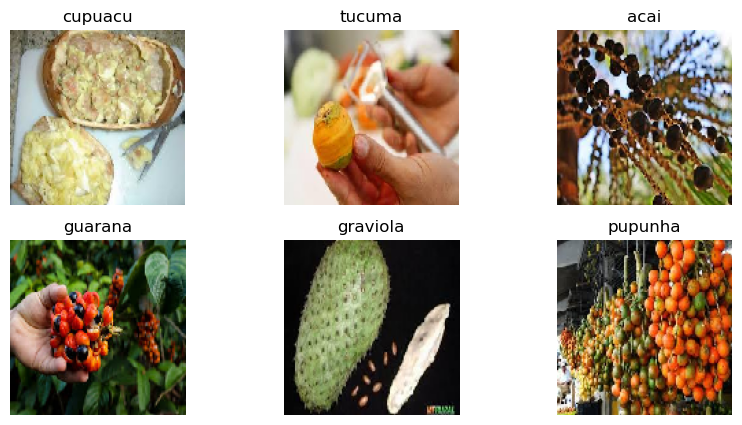

No corrupted images found.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the train dataset
train_dir = "FruitinAmazon/FruitinAmazon/train"  # Update with your actual train folder path

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
image_paths = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = os.listdir(class_path)
    if images:  # Ensure the class directory has images
        image_paths.append(os.path.join(class_path, random.choice(images)))

# Display the images in a grid format (2 rows)
num_classes = len(image_paths)
fig, axes = plt.subplots(nrows=2, ncols=(num_classes + 1) // 2, figsize=(12, 6))

for ax, img_path, label in zip(axes.flatten(), image_paths, class_dirs):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

# List to store corrupted image paths
corrupted_images = []

# Iterate through each class subdirectory
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    # Iterate through images in the class directory
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            # Attempt to open the image
            with Image.open(img_path) as img:
                img.verify()  # Verify image integrity

        except (IOError, SyntaxError):  # Catch corruption errors
            corrupted_images.append(img_path)
            os.remove(img_path)  # Remove corrupted image
            print(f"Removed corrupted image: {img_path}")

# Print final status
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"Total corrupted images removed: {len(corrupted_images)}")

No Corrupted Images Found.


In [ ]:
import tensorflow as tf

def load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split):
    rescale = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    return train_ds, val_ds

# Example usage
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds, val_ds = load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Define number of classes (Update based on dataset)
num_classes = 6

# Build CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Print model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)


In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=10, restore_best_weights=True)
]
history = model.fit(train_ds, epochs=250, validation_data=val_ds, callbacks=callbacks)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.1428 - loss: 2.8781 - val_accuracy: 0.0000e+00 - val_loss: 1.8457
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.2778 - loss: 1.9199 - val_accuracy: 0.1111 - val_loss: 2.5066
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.4753 - loss: 1.4294 - val_accuracy: 0.2778 - val_loss: 1.5844
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - accuracy: 0.5690 - loss: 1.2264 - val_accuracy: 0.8333 - val_loss: 0.9340
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.6979 - loss: 1.0487 - val_accuracy: 0.5556 - val_loss: 1.1364
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.7383 - loss: 0.8402 - val_accuracy: 0.6667 - val_loss: 1.1781
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8416 - loss: 0.6296 - val_accuracy: 0.7778 - val_loss: 0.6495
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.9036 - loss: 0.4485 - val_accuracy: 0.8889 

In [ ]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'FruitinAmazon/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.5333 - loss: 1.4869
Test accuracy: 0.5333


In [ ]:
# Train the Model
history = model.fit(
    train_ds,  # Training dataset (defined in Task 2)
    validation_data=val_ds,  # Validation dataset (defined in Task 2)
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks,  # Callbacks for checkpointing and early stopping
    verbose=1  # Show progress during training
)

# Print the final accuracy and loss
print("Training finished.")

Epoch 1/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.1875 - loss: 1.9041
Epoch 1: val_loss improved from inf to 1.81185, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 169ms/step - accuracy: 0.1840 - loss: 1.9495 - val_accuracy: 0.0000e+00 - val_loss: 1.8118
Epoch 2/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3047 - loss: 1.7504 
Epoch 2: val_loss did not improve from 1.81185
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.2773 - loss: 1.7497 - val_accuracy: 0.0000e+00 - val_loss: 2.0100
Epoch 3/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3906 - loss: 1.5773
Epoch 3: val_loss improved from 1.81185 to 1.29710, saving model to best_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.4036 - loss: 1.5691 - val_accuracy: 0.7778 - val_loss: 1.2971
Epoch 4/250
2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.3516 - loss: 1.4472
Epoch 4: val_loss improved from 1.29710 to 1.21677, saving model to best_model.keras
3/3 ━━━━━━

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = 'FruitinAmazon/FruitinAmazon/test'

# Initialize ImageDataGenerator for test data (no data augmentation during testing)
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

# Create test dataset from the directory
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match the input shape of the model
    batch_size=16,  # Batch size
    class_mode='sparse',  # Use sparse mode since you're using sparse_categorical_crossentropy
    shuffle=False  # Don't shuffle during evaluation
)

Found 30 images belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 - 0s - 141ms/step - accuracy: 0.5333 - loss: 1.5027
Test Loss: 1.5026522874832153
Test Accuracy: 0.5333333611488342


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


In [ ]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'FruitinAmazon/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.7667 - loss: 1.0393
Test accuracy: 0.7667


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create test dataset from the directory
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match the input shape of the model
    batch_size=16,  # Batch size
    class_mode='sparse',  # Use sparse mode since you're using sparse_categorical_crossentropy
    shuffle=False  # Don't shuffle during evaluation
)

Found 30 images belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 - 0s - 183ms/step - accuracy: 0.7667 - loss: 1.0628
Test Loss: 1.0627636909484863
Test Accuracy: 0.7666666507720947
